# Recommender system

In [583]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = pd.read_csv("../../_Data/ITHS_machine_learning_lab/ml-latest/movies.csv")
df_ratings = pd.read_csv("../../_Data/ITHS_machine_learning_lab/ml-latest/ratings.csv")

## 1.1 EDA

In [382]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [383]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [384]:
df_movies.info() # 58098 movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [385]:
df_ratings["userId"].unique().shape # 283228 users
df_ratings.info() # 27753444 ratings -> on average about 100 ratings per user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [386]:
df_ratings["rating"].describe()

count    2.775344e+07
mean     3.530445e+00
std      1.066353e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [387]:
df_ratings["rating"].value_counts()

4.0    7394710
3.0    5515668
5.0    4071135
3.5    3404360
4.5    2373550
2.0    1850627
2.5    1373419
1.0     886233
0.5     442388
1.5     441354
Name: rating, dtype: int64

Text(0.5, 1.0, 'Number of ratings')

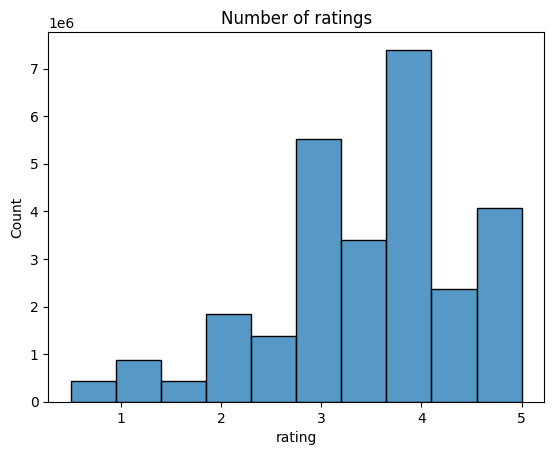

In [408]:
sns.histplot(df_ratings, x = "rating", bins=10)
plt.title("Number of ratings")

### b) Top 10 most rated movies

In [409]:
top10_id = df_ratings.groupby("movieId").count().sort_values(by = "rating", ascending=False).head(10).index

df_movies[df_movies["movieId"].isin(top10_id)]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
108,110,Braveheart (1995),Action|Drama|War
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
315,318,"Shawshank Redemption, The (1994)",Crime|Drama
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War
476,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
523,527,Schindler's List (1993),Drama|War
587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2487,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


### c) Top 10 ratings

In [530]:
# mean rating of top 10 movies is ~4.1
df_ratings[df_ratings["movieId"].isin(top10_id)]["rating"].describe()

count    826943.000000
mean          4.102288
std           0.939856
min           0.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [411]:
for id in top10_id:
    title = df_movies[df_movies["movieId"] == id]["title"].values[0]
    rating = df_ratings[df_ratings["movieId"] == id]["rating"].mean()

    print(f"{title}     Rating: {rating:.1f}")

Shawshank Redemption, The (1994)     Rating: 4.4
Forrest Gump (1994)     Rating: 4.1
Pulp Fiction (1994)     Rating: 4.2
Silence of the Lambs, The (1991)     Rating: 4.2
Matrix, The (1999)     Rating: 4.1
Star Wars: Episode IV - A New Hope (1977)     Rating: 4.1
Jurassic Park (1993)     Rating: 3.7
Schindler's List (1993)     Rating: 4.3
Braveheart (1995)     Rating: 4.0
Toy Story (1995)     Rating: 3.9


### d) Years

In [584]:
df_movies["year"] = pd.Series(df_movies["title"].str.extract(r'\((\d{4})\)', expand=False), dtype="Int64")

In [585]:
# some movies have no year in title
df_movies[df_movies["year"].isnull()]

,movieId,title,genres,year
10023,32930,Category 6: Day of Destruction,Action|Drama,<NA>
10613,40697,Babylon 5,Sci-Fi,<NA>
15719,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,<NA>
17444,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,<NA>
22651,107434,Diplomatic Immunity (2009– ),Comedy,<NA>
...,...,...,...,...
57504,192339,The Sign of Three,(no genres listed),<NA>
57674,192829,Parwaaz Hai Junoon,Adventure|Children|Romance,<NA>
57789,193149,¿Qué te juegas?,(no genres listed),<NA>
57903,193443,Wall,(no genres listed),<NA>


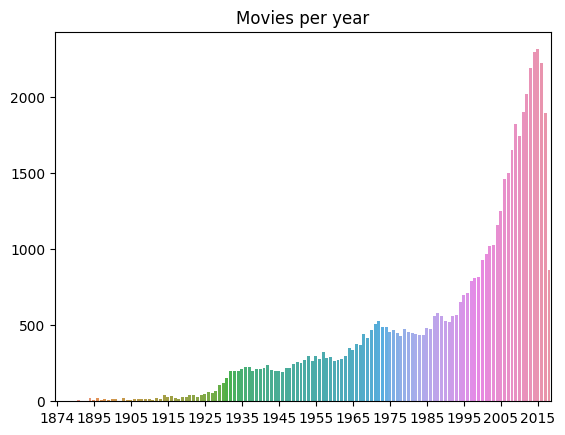

In [539]:
sns.barplot(x=df_movies["year"].value_counts().index, y=df_movies["year"].value_counts().values)
plt.xticks(list(range(0,len(df_movies["year"].unique()), 10)));
plt.title("Movies per year");

### e) Ratings

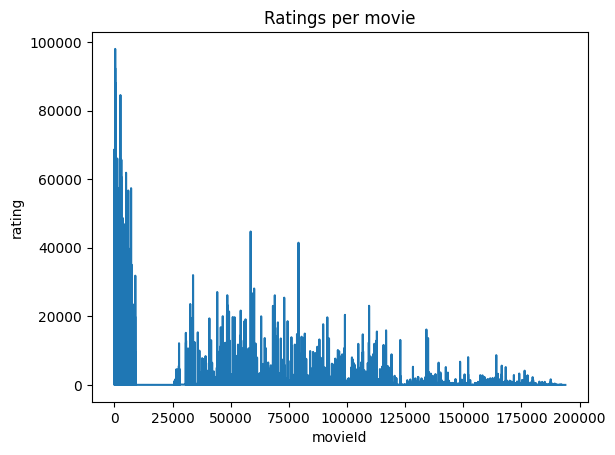

In [538]:
sorted_by_ratings = df_ratings.groupby("movieId")["rating"].count().sort_values(ascending=False)

sns.lineplot(x = sorted_by_ratings.index, y = sorted_by_ratings)
plt.title("Ratings per movie");
# there is a gap in movieIds for some reason

### f) Average ratings of films with most ratings

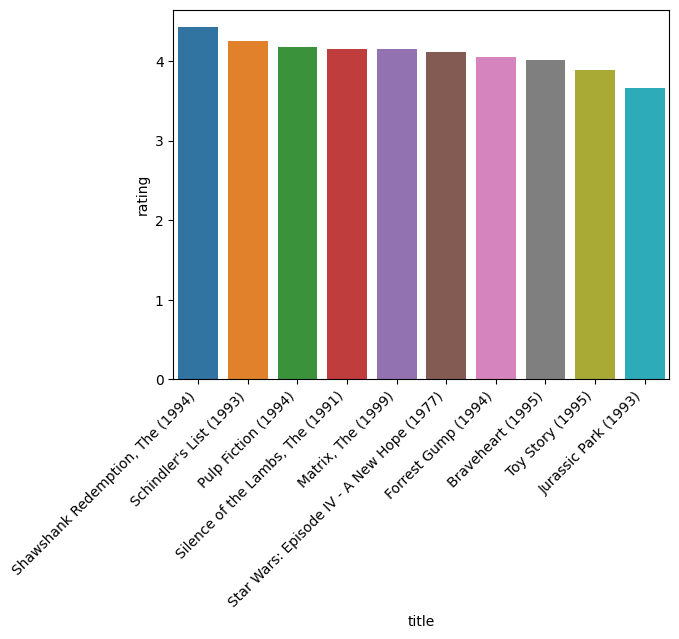

In [54]:
top10_ratings = df_ratings[df_ratings["movieId"].isin(top10_id)].groupby("movieId")["rating"].mean().reset_index().sort_values(by = "rating", ascending=False)
top10_titles = df_movies[df_movies["movieId"].isin(top10_id)].loc[:,["movieId", "title"]]

top10_df = pd.merge(top10_ratings, top10_titles)

sns.barplot(x=top10_df["title"], y = top10_df["rating"])
plt.xticks(rotation=45, ha='right');

## 1.2 Create a sparse matrix

In [540]:
df_ratings.shape

(27753444, 4)

In [534]:
# sparse matrix
from scipy.sparse import csr_matrix # compressed sparse row matrix
from scipy.sparse import csc_matrix # compressed sparse column matrix

df_ratings_filtered = df_ratings

# remove ratings from people who have few ratings since are unlikely to contribute to recommendations
df = df_ratings_filtered.groupby("userId")["rating"].count()
df = df[df < 10]
df_ratings_filtered = df_ratings_filtered[~df_ratings_filtered["userId"].isin(df.index)]

# remove movies with rating below 3.5 as they are unlikely to be the best recommendations for most people
df = df_ratings_filtered.groupby("movieId")["rating"].mean()
df = df[df < 3.5]
df_ratings_filtered = df_ratings_filtered[~df_ratings_filtered["movieId"].isin(df.index)]

# remove movies with few ratings as they are likely to be niche movies that are not the best recommendations for most people
df = df_ratings_filtered.groupby("movieId")["rating"].count()
df = df[df < 1000]
df_ratings_filtered = df_ratings_filtered[~df_ratings_filtered["movieId"].isin(df.index)]

print(f"Removed {len(df_ratings) - len(df_ratings_filtered)} ratings, remaining: {len(df_ratings_filtered)}")

Removed 12573761 ratings, remaining: 15179683


In [586]:
# remove the same movies from df_movies
df_movies_filtered = df_movies[df_movies["movieId"].isin(df_ratings_filtered["movieId"].unique())]

In [541]:
# pivot table
movies_users = df_ratings_filtered.pivot(index='movieId', columns='userId', values = 'rating').fillna(0)

# sparse matrix
matrix_movie_users = csc_matrix(movies_users.values)

## 1.3 Recommender system with KNN

In this system, every movie is a vector of coordinates for every user's rating of that movie (0 for unrated). Since it uses cosine similarity, it only looks for similarity of direction, and not the length of projection. So given a movie that a set of users have rated, it will recommend the movies rated by the largest subset of those same users, regardless of the actual ratings.

Recommender systems in general attempt to predict a user's rating of an item, given its rating of other items. A rating does not have to be explicit (like a review/like) but can be implicit (simply clicking on something shows interest). There are two main types of methods for recommender systems: content-based methods and collaborative filtering methods. The content-based approach uses item metadata to match a user with new items based on metadata from items linked to user. The collaborative filtering approach as I understand it instead tries to see what other users a user is similar to, recommending things those users have rated. Source: https://towardsdatascience.com/recommender-systems-a-complete-guide-to-machine-learning-models-96d3f94ea748

So I guess our system with KNN using cosine similarity could be said to use implicit feedback (derived from explicit feedback) in a collaborative filtering approach.

In [611]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

model_knn = NearestNeighbors(metric='cosine')

# get the indices for movieIds in sparse matrix
df_id_sparse = pd.DataFrame(movies_users.index)

def recommender(movie_name, data=matrix_movie_users, model=model_knn, n_recommendations=5):
    model.fit(data)

    # (match, # of matches, index of match) so want [2] for index
    idx = process.extractOne(movie_name, df_movies_filtered['title'])[2]
    print("Movie selected: ", df_movies_filtered['title'][idx])

    # convert index to sparse
    id = df_movies_filtered["movieId"][idx]
    idx_sparse = df_id_sparse[df_id_sparse["movieId"] == id].index[0]

    print("Searching for recommendations...")
    distances, indices=model.kneighbors(data[idx_sparse], n_neighbors = n_recommendations+1)

    for i in indices[0]:
        # convert index to df_movies
        id = df_id_sparse.iloc[i]["movieId"]

        if i != idx_sparse:
            print(df_movies_filtered[df_movies_filtered["movieId"] == id]["title"].values[0])

In [609]:
recommender('toy story')

Movie selected:  Toy Story (1995)
Searching for recommendations...
Star Wars: Episode IV - A New Hope (1977)
Toy Story 2 (1999)
Back to the Future (1985)
Jurassic Park (1993)
Forrest Gump (1994)


In [610]:
recommender('Amadeus')

Movie selected:  Amadeus (1984)
Searching for recommendations...
Graduate, The (1967)
Apocalypse Now (1979)
Wizard of Oz, The (1939)
Citizen Kane (1941)
2001: A Space Odyssey (1968)


In [595]:
recommender('Fellowship of the ring')

Movie selected:  Lord of the Rings: The Fellowship of the Ring, The (2001)
Searching for recommendations...
Lord of the Rings: The Two Towers, The (2002)
Lord of the Rings: The Return of the King, The (2003)
Matrix, The (1999)
Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Shrek (2001)


In [596]:
recommender('Blade Runner 2049')

Movie selected:  Blade Runner 2049 (2017)
Searching for recommendations...
Dunkirk (2017)
Three Billboards Outside Ebbing, Missouri (2017)
Thor: Ragnarok (2017)
Baby Driver (2017)
Arrival (2016)


In [597]:
recommender('Arrival 2016')

Movie selected:  Arrival (2016)
Searching for recommendations...
Logan (2017)
Rogue One: A Star Wars Story (2016)
Doctor Strange (2016)
The Martian (2015)
Ex Machina (2015)
